Используя фреймворк PyTorch, построим неглубокую нейронную сеть, которая аппроксимирует синус на отрезке [0,3]

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
n = 1 #Кол-во входных данных
m = 8 #Кол-во скрытых юнитов
training_dataset_dim = 20 #Кол-во пар данных
X = torch.Tensor(training_dataset_dim, 1).uniform_(0.0, 3.0) #Training dataset
Y = torch.sin(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=6) #Разделим множество пар данных на обучаемые и тестовые

In [ ]:
class Net(nn.Module): #Класс нейросеть наследуется от абстактного класса Module

  def __init__(self):
    super(Net, self).__init__() #Для инициализации унаследованных свойств вызываем метод инициализации родительского класса

    self.linear_layer_1 = nn.Linear(n, m, bias = True)
    self.activation = nn.ReLU()
    self.linear_layer_2 = nn.Linear(m, n, bias = True)

  def forward(self, x): #В этом методе прописывается, как нейросеть будет обрабатывать данные, поданные ей на вход.

    x = self.linear_layer_1(x)
    x = self.activation(x)
    x = self.linear_layer_2(x)
    return x

In [ ]:
model = Net()

Посмотрим на результаты необученной модели на тестовой выборке и визуализируем.

In [ ]:
prediction = model.forward(X_test)
prediction = prediction.tolist()

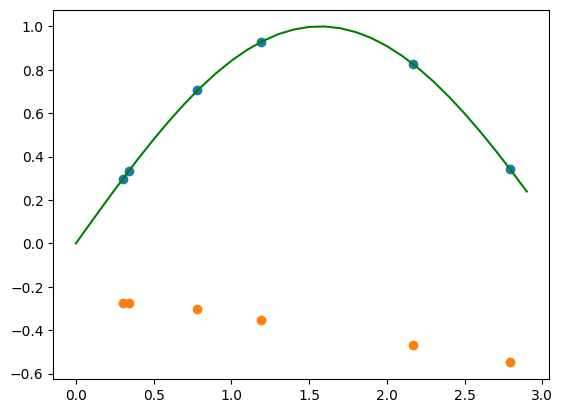

In [ ]:
k = torch.arange(0,3, 0.1)
sin = torch.sin(k)
plt.plot(k,sin,'g')
plt.scatter(X_test, Y_test)
plt.scatter(X_test, prediction)
plt.show()

Будем обучать

In [ ]:
def train(model, X, Y, optimizer, num_epoch):
    # args:
    #     model - модель нейронной сети
    #     X и Y - обучающая выборка
    #     optimizer - оптимизатор, взятый из модуля `torch.optim`
    #     num_epoch - количество эпох обучения

    for i in range(num_epoch):
      # Считаем предсказание
      y_pred = model.forward(X)
      # Считаем среднеквадратичное отклонение от обучающих данных
      Loss_function = torch.nn.MSELoss()
      loss = Loss_function(y_pred, Y_train)
      # Выполним подсчёт новых градиентов
      loss.backward()
      # Выполним шаг градиентного спуска
      optimizer.step()
      # Обнулим сохраненные у оптимизатора значения градиентов перед следующим шагом обучения
      optimizer.zero_grad()

    return model


In [ ]:
model = Net()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.09) #Stochastic Gradient Descent
model = train(model, X_train, Y_train, optimizer, 11000)

Теперь посмотрим на результаты обученной модели на тестовой выборке и визуализируем.

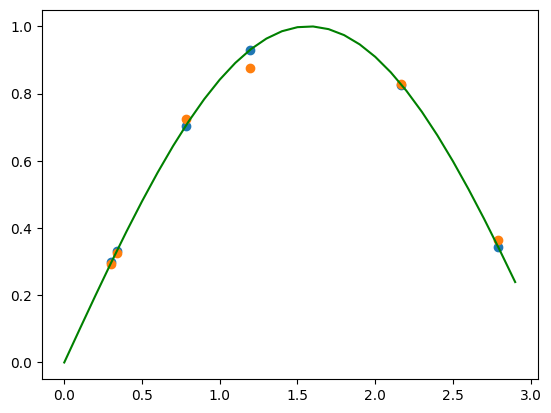

In [ ]:
prediction = model.forward(X_test)
prediction = prediction.tolist()
k = torch.arange(0,3, 0.1)
sin = torch.sin(k)
plt.plot(k,sin,'g')
plt.scatter(X_test, Y_test)
plt.scatter(X_test, prediction)
#plt.scatter(X_train, Y_train)
plt.show()

linear_layer.weight

---

linear_layer.bias

---

